# BBC News Article Classification - Data Exploration
**Author:** Lucas Little  
**Date:** February 2024

## Objectives

1. Perform initial data exploration and visualization of the BBC news dataset
2. Analyze dataset characteristics (size, categories, article lengths)
3. Assess data quality and identify cleaning needs
4. Study text patterns and distributions
5. Develop an approach for article classification based on findings

## 1. Data Inspection & Visualization

In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings

warnings.filterwarnings('ignore')

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/luke/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/luke/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### 1.1 Data Loading and Initial Inspection

In [26]:
# Read the data
train_df = pd.read_csv('../data/BBC News Train.csv')
test_df = pd.read_csv('../data/BBC News Test.csv')

# Display basic information about the datasets
print("Training Dataset Shape:", train_df.shape)
print("\nTraining Dataset Info:")
print(train_df.info())

# Check for missing values
print("\nMissing Values in Training Dataset:")
print(train_df.isnull().sum())

# Remove any rows with missing values
train_df = train_df.dropna()
test_df = test_df.dropna()

print("\nDataset shapes after removing missing values:")
print("Training Dataset:", train_df.shape)
print("Test Dataset:", test_df.shape)

Training Dataset Shape: (1490, 3)

Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB
None

Missing Values in Training Dataset:
ArticleId    0
Text         0
Category     0
dtype: int64

Dataset shapes after removing missing values:
Training Dataset: (1490, 3)
Test Dataset: (735, 2)


### 1.2 Category Distribution Analysis

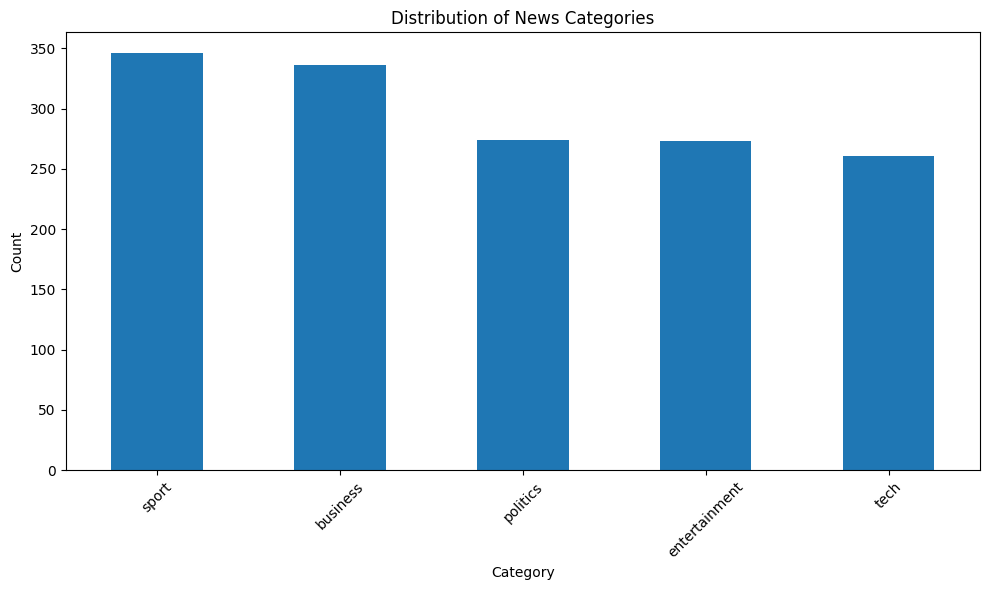


Category Distribution Analysis:
Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64

Key Insights:
1. The dataset shows some class imbalance
2. This may need to be addressed in the modeling phase


In [27]:
# Display category distribution
plt.figure(figsize=(10, 6))
train_df['Category'].value_counts().plot(kind='bar')
plt.title('Distribution of News Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analysis insights
print("\nCategory Distribution Analysis:")
print(train_df['Category'].value_counts())
print("\nKey Insights:")
print("1. The dataset shows some class imbalance")
print("2. This may need to be addressed in the modeling phase")

## 2. Word Feature Extraction

### 2.1 TF-IDF Overview

TF-IDF (Term Frequency-Inverse Document Frequency) converts text into numerical features:

1. Term Frequency: Counts word occurrences in each article
2. Inverse Document Frequency: Reduces importance of common words
3. Final Score: Identifies uniquely important words per article

**Advantages:**
1. Captures word frequency and importance
2. Automatically handles common words
3. Creates ML-compatible features
4. Computationally efficient vs. Word2Vec

In [28]:
# Function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = str(text).lower()
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords and non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    
    return ' '.join(tokens)

### 2.2 TF-IDF Implementation

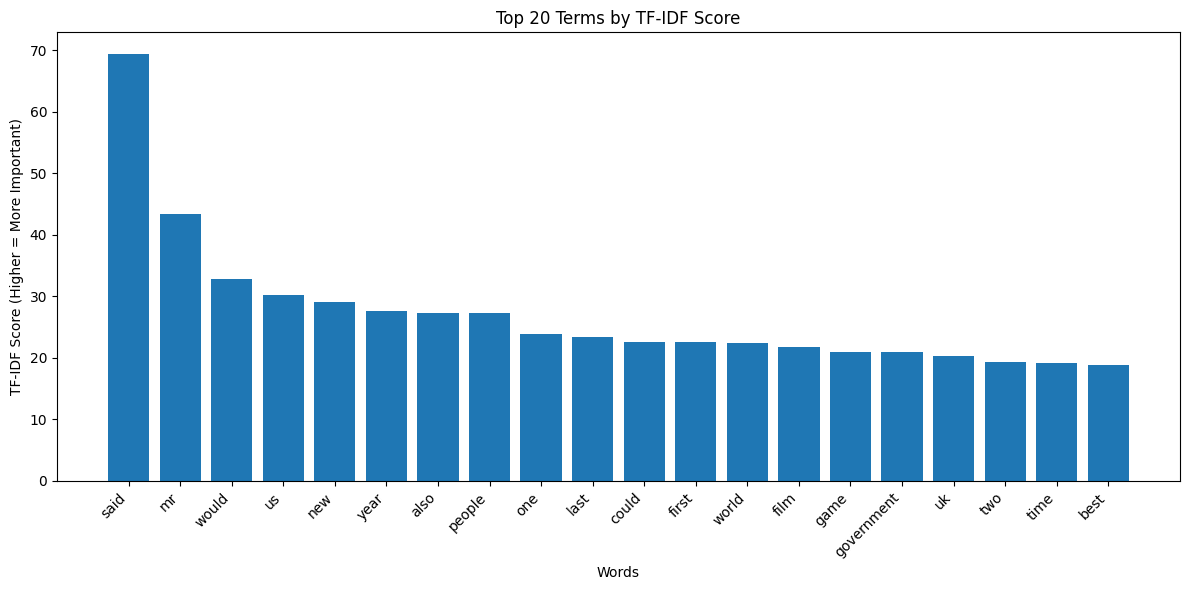


Key Insights from TF-IDF Analysis:
1. Most important terms reflect different news categories
2. Common but less meaningful words have been filtered out
3. Term importance varies significantly across articles


In [29]:
# Apply preprocessing to a sample of articles
sample_size = min(1000, len(train_df))
sample_processed = train_df['Text'].head(sample_size).apply(preprocess_text)

# Create TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(sample_processed)

# Get the most common terms
feature_names = vectorizer.get_feature_names_out()
tfidf_sums = tfidf_matrix.sum(axis=0).A1
top_indices = tfidf_sums.argsort()[-20:][::-1]

# Plot most common terms
plt.figure(figsize=(12, 6))
plt.bar(range(20), tfidf_sums[top_indices])
plt.xticks(range(20), [feature_names[i] for i in top_indices], rotation=45, ha='right')
plt.title('Top 20 Terms by TF-IDF Score')
plt.xlabel('Words')
plt.ylabel('TF-IDF Score (Higher = More Important)')
plt.tight_layout()
plt.show()

print("\nKey Insights from TF-IDF Analysis:")
print("1. Most important terms reflect different news categories")
print("2. Common but less meaningful words have been filtered out")
print("3. Term importance varies significantly across articles")

## 3. Word Statistics & Visualization


Text Statistics:
        word_count    char_count
count  1490.000000   1490.000000
mean    385.012752   2233.461745
std     210.898616   1205.153358
min      90.000000    501.000000
25%     253.000000   1453.000000
50%     337.000000   1961.000000
75%     468.750000   2751.250000
max    3345.000000  18387.000000


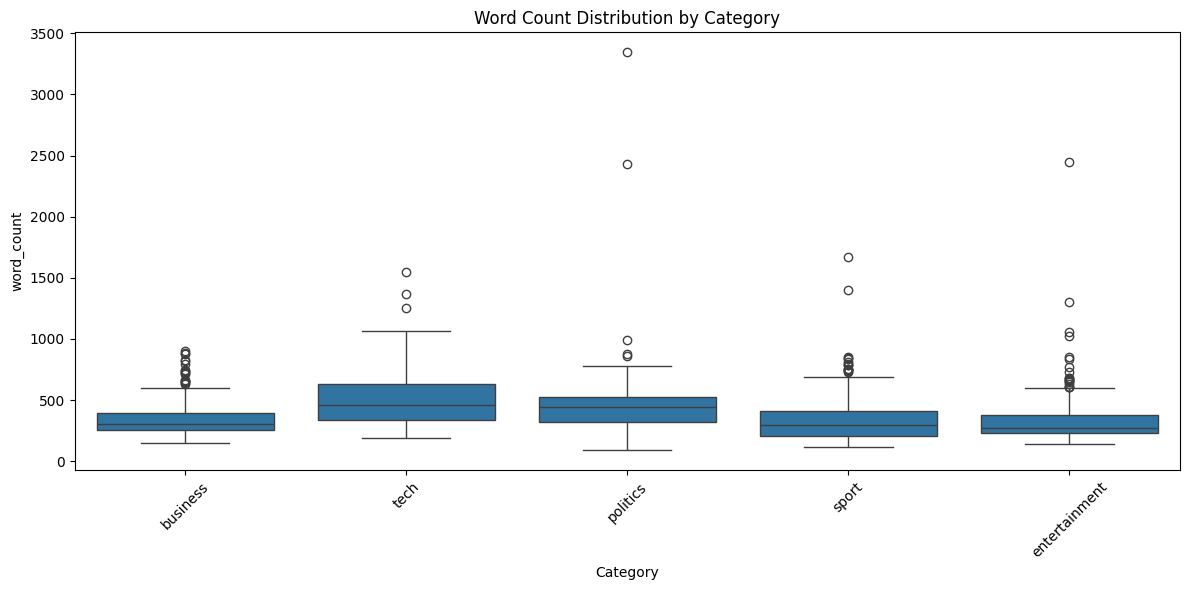


Key Insights:
1. Average article length varies significantly by category
2. Some categories show more variance in length than others
3. Length variation could be a useful feature for classification


In [30]:
# Basic text statistics
train_df['word_count'] = train_df['Text'].apply(lambda x: len(str(x).split()))
train_df['char_count'] = train_df['Text'].apply(len)

# Display text statistics
print("\nText Statistics:")
print(train_df[['word_count', 'char_count']].describe())

# Plot word count distribution by category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='word_count', data=train_df)
plt.title('Word Count Distribution by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nKey Insights:")
print("1. Average article length varies significantly by category")
print("2. Some categories show more variance in length than others")
print("3. Length variation could be a useful feature for classification")

## 4. Analysis Plan

### 4.1 Data Preprocessing
1. Remove special characters and numbers
2. Convert text to lowercase
3. Remove stopwords
4. Consider lemmatization for word variations

### 4.2 Feature Engineering
1. Use TF-IDF vectorization for main features
2. Include article length as additional feature
3. Consider n-grams for phrase patterns

### 4.3 Modeling Approach
1. Handle class imbalance (sampling/weighting)
2. Try multiple classifiers (SVM, Random Forest)
3. Use cross-validation for evaluation

## References

1. Rajaraman, A., & Ullman, J. D. (2011). Mining of massive datasets. Cambridge University Press.
2. Bird, S., Klein, E., & Loper, E. (2009). Natural language processing with Python. O'Reilly Media Inc.
3. Scikit-learn Documentation: TfidfVectorizer. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
4. Manning, C. D., & Schütze, H. (1999). Foundations of statistical natural language processing. MIT press.